# Reading and plotting from netCDF 

We start the notebook with the comand "%matplotlib inline" which tells matplotlib to display plots on the notebook itself.

In [65]:
%matplotlib inline

Now we import the libraries that will be used in this notebook.

In [3]:
import numpy as np # numpy does most of the operations involving arrays
import matplotlib.pyplot as plt # matplotlib does graphics
from netCDF4 import Dataset, num2date # netCDF4 handles netCDF files

Now we specify the path to the netCDF file we want to read

In [4]:
path = "../data/wave_data/ww3_hs_19920101.nc"

The function "Dataset" is used to open the netCDF. We specify that we're opening it on reading mode with the option 'r'.

In [6]:
nc = Dataset(path, 'r') 

 Now we have created the object nc. Let's check what is on this object:

In [7]:
print dir(nc)

['__class__', '__delattr__', '__doc__', '__enter__', '__exit__', '__format__', '__getattr__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__new__', '__orthogonal_indexing__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '_enddef', '_grpid', '_isopen', '_redef', 'close', 'cmptypes', 'createCompoundType', 'createDimension', 'createEnumType', 'createGroup', 'createVLType', 'createVariable', 'data_model', 'delncattr', 'dimensions', 'disk_format', 'enumtypes', 'file_format', 'filepath', 'get_variables_by_attributes', 'getncattr', 'groups', 'isopen', 'keepweakref', 'ncattrs', 'parent', 'path', 'renameAttribute', 'renameDimension', 'renameGroup', 'renameVariable', 'set_auto_mask', 'set_auto_maskandscale', 'set_auto_scale', 'set_fill_off', 'set_fill_on', 'setncattr', 'setncattr_string', 'setncatts', 'sync', 'variables', 'vltypes']


We note that among other thing, the object nc has "variables". Now let'see what is on "variables" 

In [11]:
print dir(nc.variables)

['_OrderedDict__map', '_OrderedDict__marker', '_OrderedDict__root', '_OrderedDict__update', '__class__', '__cmp__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'clear', 'copy', 'fromkeys', 'get', 'has_key', 'items', 'iteritems', 'iterkeys', 'itervalues', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values', 'viewitems', 'viewkeys', 'viewvalues']


So, nc.variables is a dictionary. Let's check its keys.

In [12]:
print nc.variables.keys()

[u'time', u'latitude', u'longitude', u'swh']


This tell us that this netCDF file has the variables time, latitude, longitude, and swh. We may wonder what swh is. The beauty of the netCDF format is that it stores all the information for us, and if done properly, there should be all the information needed to understand the data. 

In [14]:
print dir(nc.variables['swh'])

[u'_FillValue', '__array__', '__class__', '__delattr__', '__delitem__', '__doc__', '__format__', '__getattr__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__len__', '__new__', '__orthogonal_indexing__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '_assign_vlen', '_cmptype', '_enumtype', '_get', '_getdims', '_getname', '_grp', '_grpid', '_has_lsd', '_iscompound', '_isenum', '_isprimitive', '_isvlen', '_name', '_nunlimdim', '_put', '_toma', '_varid', '_vltype', 'assignValue', u'center', 'chunking', 'datatype', 'delncattr', 'dimensions', 'dtype', 'endian', 'filters', 'getValue', 'get_var_chunk_cache', 'getncattr', u'grid_type', 'group', u'initial_time', u'level', u'level_type', u'long_name', 'mask', 'name', 'ncattrs', 'ndim', u'parameter_discipline_and_category', u'parameter_template_discipline_category_number', u'production_status', 'renameAttribute', 'scale', 'set_auto_mask', 'set_a

We can check the attributes of a given variable, by:

In [25]:
print nc.variables['swh'].ncattrs()

[u'_FillValue', u'initial_time', u'level', u'level_type', u'parameter_template_discipline_category_number', u'parameter_discipline_and_category', u'grid_type', u'units', u'long_name', u'production_status', u'center']


Now lets loop trhough all the attributes

In [35]:
for at in nc.variables['swh'].ncattrs():
    print "%s : %s" %(at, nc.variables['swh'].getncattr(at))

_FillValue : 1e+20
initial_time : 01/01/1992 (00:00)
level : 1.0
level_type : Ground or water surface
parameter_template_discipline_category_number : [ 0 10  0  3]
parameter_discipline_and_category : Oceanographic products, Waves
grid_type : Latitude/longitude
units : m
long_name : Significant height of combined wind waves and swell
production_status : Operational products
center : US National Weather Service - NCEP (WMC)


We can also check the dimensions of a given variable

In [39]:
print nc.variables['swh'].dimensions

(u'latitude', u'longitude')


One important thing to note when dealing with netCDFs is the way to handle time. In order optimize the storage, time is usually saved as an integer relative to a given reference date (e.g. "days since 1900-01-01", or "hours since 1987-01-01 00:00:0.0). Let's see how to convert the netCDF time to "real" time.

In [50]:
print nc.variables['time'][:]

[645792]


In [51]:
print nc.variables['time'].ncattrs()

[u'units']


So, the variable "time" has an attribute called "units", that shows the reference time for this file. In this case "hours since 1918-05-01"

In [52]:
print nc.variables['time'].units

hours since 1918-05-01


We can use the function "num2date" to convert the values on nc.variables['time'][:], to actual time using its given units.

In [53]:
time = num2date(nc.variables['time'][:], nc.variables['time'].units)

In [56]:
print time

[datetime.datetime(1992, 1, 1, 0, 0)]


Now lets read the other variables. And check their shape.

In [63]:
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
swh = nc.variables['swh'][:]

In [62]:
print time.shape
print lat.shape
print lon.shape
print swh.shape

(1,)
(361,)
(720,)
(361, 720)


We see that the variable "lat" has 361 points and the variable "lon" has 720 points. Also that the variable "swh" has two dimensions (lat, lon). Now lets see how to plot a map of the significant wave height (swh).

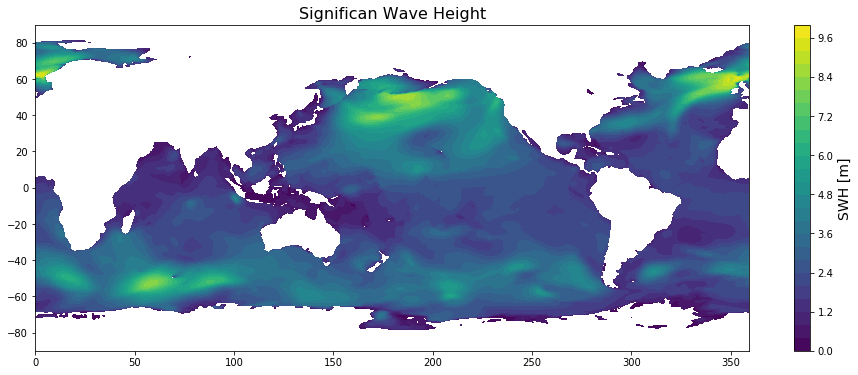

In [68]:
plt.figure(figsize=(16,6))
plt.contourf(lon, lat, swh, 30)
cbar = plt.colorbar()
cbar.set_label('SWH [m]', fontsize=14)
plt.title('Significan Wave Height', fontsize=16)